In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

import networkx as nx
import pylab as plt

In [2]:
covid_model = BayesianNetwork(
    [
        ("gender", "smoke"),
        ("gender", "diabetes"),
        ("smoke", "covid"),
        ("diabetes", "covid"),
        ("vaccinated", "covid"),
        ("covid", "death")
    ]
)

cpd_gender = TabularCPD(variable="gender", variable_card=2, values=[[0.6], [0.4]], 
                      state_names={'gender': ['male', 'female']})

cpd_vaccinated = TabularCPD(variable="vaccinated", variable_card=2, values=[[0.5], [0.5]],
                           state_names={'vaccinated': ['yes', 'no']})

cpd_smoke = TabularCPD(
    variable="smoke",
    variable_card=2,
    values=[[0.25, 0.15], 
            [0.75, 0.85]],
    evidence=["gender"],
    evidence_card=[2],
    state_names={'gender': ['male', 'female'], 'smoke': ['yes', 'no']}
)

cpd_diabetes = TabularCPD(
    variable="diabetes",
    variable_card=2,
    values=[[0.10, 0.07], 
            [0.90, 0.93]],
    evidence=["gender"],
    evidence_card=[2],
    state_names={'gender': ['male', 'female'], 'diabetes': ['yes', 'no']}
)

cpd_covid = TabularCPD(
    variable="covid",
    variable_card=2,
    values=[[0.20, 0.70, 0.15, 0.65, 0.15, 0.65, 0.10, 0.60], 
            [0.80, 0.30, 0.85, 0.35, 0.85, 0.35, 0.90, 0.40]],
    evidence=["smoke", "diabetes", "vaccinated"],
    evidence_card=[2, 2, 2],
    state_names={'smoke': ['yes', 'no'], 'diabetes': ['yes', 'no'], 
                 'vaccinated': ['yes', 'no'], 'covid': ['yes', 'no']}
)

cpd_death = TabularCPD(
    variable="death",
    variable_card=2,
    values=[[0.3, 0.01], 
            [0.7, 0.99]],
    evidence=["covid"],
    evidence_card=[2],
    state_names={'covid': ['yes', 'no'], 'death': ['yes', 'no']}
)

# Associating the parameters with the model structure.
covid_model.add_cpds(cpd_gender, cpd_vaccinated, cpd_smoke, cpd_diabetes, cpd_covid, cpd_death)

# Checking if the cpds are valid for the model.
covid_model.check_model()

True

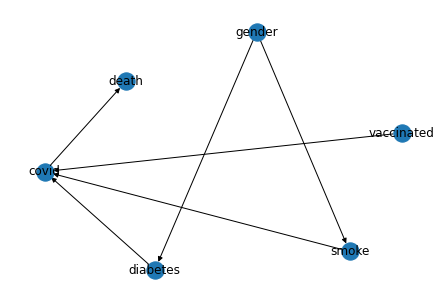

In [3]:
nx.draw(covid_model, with_labels=True)
plt.show()

In [4]:
print(covid_model.is_dconnected("gender", "smoke"))
print(covid_model.is_dconnected("gender", "death"))
print(covid_model.is_dconnected("gender", "death", observed=["covid"]))

True
True
False


In [5]:
print(covid_model.active_trail_nodes("gender"))
print(covid_model.active_trail_nodes("smoke"))
print(covid_model.active_trail_nodes("diabetes"))
print(covid_model.active_trail_nodes("vaccinated"))
print(covid_model.active_trail_nodes("covid"))
print(covid_model.active_trail_nodes("death"))

{'gender': {'gender', 'diabetes', 'death', 'smoke', 'covid'}}
{'smoke': {'gender', 'diabetes', 'death', 'smoke', 'covid'}}
{'diabetes': {'gender', 'diabetes', 'death', 'smoke', 'covid'}}
{'vaccinated': {'vaccinated', 'death', 'covid'}}
{'covid': {'gender', 'diabetes', 'death', 'smoke', 'vaccinated', 'covid'}}
{'death': {'gender', 'diabetes', 'death', 'smoke', 'vaccinated', 'covid'}}


In [6]:
covid_model.get_independencies()

(gender ⟂ vaccinated)
(gender ⟂ vaccinated | diabetes)
(gender ⟂ vaccinated | smoke)
(gender ⟂ death | covid)
(gender ⟂ vaccinated, death, covid | diabetes, smoke)
(gender ⟂ death | diabetes, covid)
(gender ⟂ death | covid, smoke)
(gender ⟂ death | vaccinated, covid)
(gender ⟂ vaccinated, covid | diabetes, death, smoke)
(gender ⟂ death, covid | vaccinated, diabetes, smoke)
(gender ⟂ vaccinated, death | diabetes, covid, smoke)
(gender ⟂ death | vaccinated, diabetes, covid)
(gender ⟂ death | vaccinated, covid, smoke)
(gender ⟂ covid | vaccinated, diabetes, death, smoke)
(gender ⟂ vaccinated | covid, diabetes, death, smoke)
(gender ⟂ death | vaccinated, diabetes, covid, smoke)
(diabetes ⟂ vaccinated)
(diabetes ⟂ vaccinated, smoke | gender)
(diabetes ⟂ vaccinated | smoke)
(diabetes ⟂ death | covid)
(diabetes ⟂ vaccinated | gender, smoke)
(diabetes ⟂ smoke | gender, vaccinated)
(diabetes ⟂ death | gender, covid)
(diabetes ⟂ death | covid, smoke)
(diabetes ⟂ death | vaccinated, covid)
(diabe

In [7]:
print(cpd_gender)
print(cpd_vaccinated)
print(cpd_smoke)
print(cpd_diabetes)
print(cpd_covid)
print(cpd_death)

+----------------+-----+
| gender(male)   | 0.6 |
+----------------+-----+
| gender(female) | 0.4 |
+----------------+-----+
+-----------------+-----+
| vaccinated(yes) | 0.5 |
+-----------------+-----+
| vaccinated(no)  | 0.5 |
+-----------------+-----+
+------------+--------------+----------------+
| gender     | gender(male) | gender(female) |
+------------+--------------+----------------+
| smoke(yes) | 0.25         | 0.15           |
+------------+--------------+----------------+
| smoke(no)  | 0.75         | 0.85           |
+------------+--------------+----------------+
+---------------+--------------+----------------+
| gender        | gender(male) | gender(female) |
+---------------+--------------+----------------+
| diabetes(yes) | 0.1          | 0.07           |
+---------------+--------------+----------------+
| diabetes(no)  | 0.9          | 0.93           |
+---------------+--------------+----------------+
+------------+-----------------+----------------+-----------------

In [8]:
infer = VariableElimination(covid_model)
for node in ['gender', 'smoke', 'diabetes', 'vaccinated', 'covid', 'death']:
    print('Node:', node)
    g_dist = infer.query([node])
    print(g_dist)


Node: gender


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----------------+---------------+
| gender         |   phi(gender) |
+================+===============+
| gender(male)   |        0.6000 |
+----------------+---------------+
| gender(female) |        0.4000 |
+----------------+---------------+
Node: smoke


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------------+--------------+
| smoke      |   phi(smoke) |
+============+==============+
| smoke(yes) |       0.2100 |
+------------+--------------+
| smoke(no)  |       0.7900 |
+------------+--------------+
Node: diabetes


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+---------------+-----------------+
| diabetes      |   phi(diabetes) |
+===============+=================+
| diabetes(yes) |          0.0880 |
+---------------+-----------------+
| diabetes(no)  |          0.9120 |
+---------------+-----------------+
Node: vaccinated


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------------+-------------------+
| vaccinated      |   phi(vaccinated) |
+=================+===================+
| vaccinated(yes) |            0.5000 |
+-----------------+-------------------+
| vaccinated(no)  |            0.5000 |
+-----------------+-------------------+
Node: covid


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+------------+--------------+
| covid      |   phi(covid) |
+============+==============+
| covid(yes) |       0.3649 |
+------------+--------------+
| covid(no)  |       0.6351 |
+------------+--------------+
Node: death


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------+--------------+
| death      |   phi(death) |
+============+==============+
| death(yes) |       0.1158 |
+------------+--------------+
| death(no)  |       0.8842 |
+------------+--------------+


In [9]:
infer = VariableElimination(covid_model)
g_dist = infer.query(['covid', 'vaccinated'])
print(g_dist)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------------+------------+-------------------------+
| vaccinated      | covid      |   phi(vaccinated,covid) |
+=================+============+=========================+
| vaccinated(yes) | covid(yes) |                  0.0575 |
+-----------------+------------+-------------------------+
| vaccinated(yes) | covid(no)  |                  0.4426 |
+-----------------+------------+-------------------------+
| vaccinated(no)  | covid(yes) |                  0.3075 |
+-----------------+------------+-------------------------+
| vaccinated(no)  | covid(no)  |                  0.1926 |
+-----------------+------------+-------------------------+


In [10]:
print(infer.query(['covid'], evidence={'vaccinated': 'yes'}))
print(infer.query(['covid'], evidence={'vaccinated': 'no'}))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+------------+--------------+
| covid      |   phi(covid) |
+============+==============+
| covid(yes) |       0.1149 |
+------------+--------------+
| covid(no)  |       0.8851 |
+------------+--------------+


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+------------+--------------+
| covid      |   phi(covid) |
+============+==============+
| covid(yes) |       0.6149 |
+------------+--------------+
| covid(no)  |       0.3851 |
+------------+--------------+


In [12]:
print(infer.query(['covid'], evidence={'diabetes': 'yes', 'smoke': 'yes'}))
print(infer.query(['covid'], evidence={'diabetes': 'no', 'smoke': 'no'}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------------+--------------+
| covid      |   phi(covid) |
+============+==============+
| covid(yes) |       0.4500 |
+------------+--------------+
| covid(no)  |       0.5500 |
+------------+--------------+


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------------+--------------+
| covid      |   phi(covid) |
+============+==============+
| covid(yes) |       0.3500 |
+------------+--------------+
| covid(no)  |       0.6500 |
+------------+--------------+
